In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
df_raw = pd.read_csv("/content/drive/MyDrive/data/Sample_Superstore_v2.csv",
                     encoding='latin1')

In [ ]:
df_raw.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df_raw.describe(include=['O'])

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [ ]:
df_key_fields = df_raw[['Customer ID', 'Sub-Category', 'Sales']].copy()

In [ ]:
df_cust_sales = df_key_fields.pivot_table(values = 'Sales',
                                          columns = 'Sub-Category',
                                          aggfunc=np.sum,
                                          index='Customer ID')

In [ ]:
df_cust_sales.fillna(0, inplace=True)

In [ ]:
df_cust_sales.iloc[:,1:] = df_cust_sales.iloc[:,1:].applymap(lambda x: np.log(x+1))

In [ ]:
df_cust_sales.fillna(0.0, inplace=True)

In [ ]:
df_for_pca = df_cust_sales.copy()

In [ ]:
pca = PCA()
df_pca = pca.fit_transform(df_for_pca)
np.cumsum(pca.explained_variance_ratio_)

array([0.99945   , 0.99953693, 0.99959492, 0.99964698, 0.99969419,
       0.99973759, 0.99977795, 0.99981226, 0.99984433, 0.99987236,
       0.99989738, 0.99991997, 0.99994054, 0.99995892, 0.99997657,
       0.99999202, 1.        ])

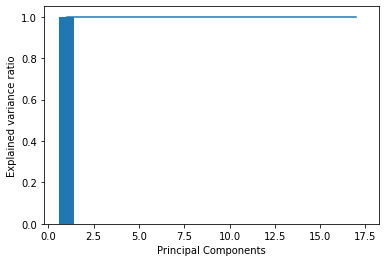

In [ ]:
plt.bar(range(1,df_pca.shape[1]+1),pca.explained_variance_ratio_,align='center')
plt.step(range(1,df_pca.shape[1]+1 ), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')

plt.show()

In [ ]:
#Find number of components based on 90% variance ratio explained 
n_components = 2

In [ ]:
pca_components = PCA(n_components = n_components)

In [ ]:
pca_arr = pca_components.fit_transform(df_for_pca)

49


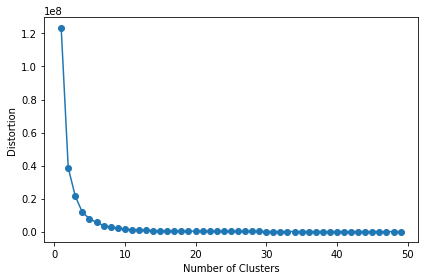

In [ ]:
distortions = []
for i in range(1,50):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(pca_arr)
    distortions.append(km.inertia_)

print(len(distortions))
plt.plot(range(1,len(distortions)+1), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()